In [14]:
import os
import sys
import numpy as np
import scipy.io as sio
import glob
import pandas as pd
from matplotlib import cm
from scipy.interpolate import griddata
import numpy.ma as ma
import pylab as plt
import sys
sys.path.append("/eos/user/n/nkarast/SWAN/PyNAFF/")
from PyNAFF import naff
%matplotlib inline
print 'done'

done


In [134]:
# Import data
# source_dir = 'Step2_x/'
source_dir = 'Step4_x/'
case = 'Step4_x_I=1.9E11'
Qx = 4.3504
Qy = 3.2
filename = 'mainbunch'
n_part = 100
n_turns = 1024
files = glob.glob(source_dir + filename + '*.mat')
files.sort()
df_data=pd.DataFrame({})
for i, file in enumerate(files):
    print i
    particles = sio.loadmat(file)
    data=(zip(particles['particles'][0][0]['x'].flatten().tolist(),particles['particles'][0][0]['xp'].flatten().tolist(),particles['particles'][0][0]['y'].flatten().tolist(),particles['particles'][0][0]['yp'].flatten().tolist(),particles['particles'][0][0]['z'].flatten().tolist(),particles['particles'][0][0]['dE'].flatten().tolist(),particles['particles'][0][0]['ParticleIdNumber'].flatten().tolist(),particles['particles'][0][0]['macrosize'].flatten().tolist()))
    data=np.array(sorted(data, key=lambda x:x[-1]))
    df=pd.DataFrame(np.array(data)[:,:7],index=np.array(data).astype('int64')[:,6], columns=['x','xp','y','yp','z','dE','macrosize'])
    df_data=df_data.append(df)
    
#print data
#df_data.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [124]:
# Check the tune of a single particle
n_turns = 1024
min_particle = 3
if min_particle%2:
    turns_half=(n_turns/2)-(min_particle+1)
else:
    turns_half=n_turns/2-(min_particle)
naff(data=np.array(df_data['x'].iloc[3::n_part]), turns=turns_half, nterms=1)
turns_half

508

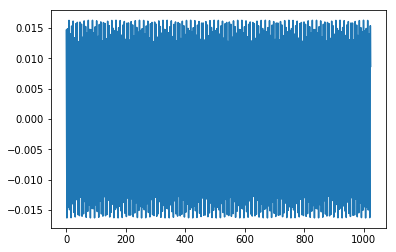

In [125]:
# Plot trajectory of a single particle
plt.plot(np.linspace(0,1023,n_turns), df_data['x'].iloc[min_particle::n_part])

In [126]:
# Make an array of the tunes
tunes=[]
for i in xrange(min_particle,n_part):
    tunes.append(naff(data=np.array(df_data['x'].iloc[i::n_part]), turns=turns_half, nterms=1)[0][1])

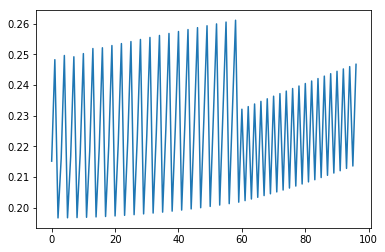

In [127]:
# Plot the tune array
plt.plot(tunes)

In [128]:
# Ways to access particle data etc
n=3
#df_data['x'].iloc[n::n_part]               #Raw particle 3
max(df_data['x'].iloc[n::n_part])          #Maximum amplitude in x for particle n
#np.array(df_data['x'].iloc[n::n_part])     #Iterable
#turn=5
#np.array(df_data['x'].iloc[n::n_part])[turn]  #Index

0.016281308247212467

In [129]:
# Find 'Maxmimum' amplitude
# one particle (of n_part) for each turn
# df_data['x'].iloc[:n_part:]
max_turn=1023
max_amps_y=[]
max_amps_x=[]

for i in xrange(min_particle,n_part):
    #for j in xrange(0,max_turn):
        #if (np.array(df_data['x'].iloc[i::n_part])[j]) > max_amp:
            #max_amp = np.array(df_data['x'].iloc[i::n_part])[j]
        #max_amps.append(max_amp)
    max_amps_y.append(max(df_data['y'].iloc[i::n_part]))   
    max_amps_x.append(max(df_data['x'].iloc[i::n_part]))   

In [130]:
len(max_amps_x)
#max_amps

97

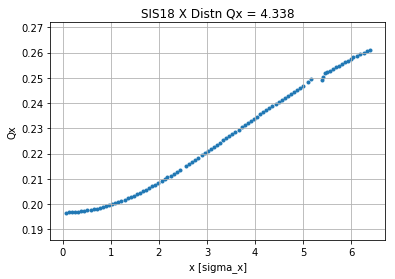

In [131]:
# Plot using maximum amplitude in sigma
betx0=12.79426135
alfx0=1.283306757 
gamx0 = (1+alfx0*alfx0)/betx0
en_x = (12.57e-6)/4
sig_x = np.sqrt(en_x * betx0)

#xx=[]
#xx = np.array(df_data['x'].iloc[min_particle:n_part:])/(np.sqrt(betx0/gamx0))

xn = max_amps_x/sig_x

plt.xlabel('x [sigma_x]')
plt.ylabel('Qx')
plt.grid()
plot_title = 'SIS18 X Distn Qx = ' + Qx
plt.title(plot_title)
plt.scatter(xn,tunes, marker='.')
plot_name = 'SIS18_' + case + 'Qx.png'
plt.savefig(plot_name, dpi=600)

[  2.32791792e-10   1.91925974e-10   6.99016931e-12   2.00940692e-10
   1.45218699e-10   1.89649008e-11   2.15122309e-10   1.45685559e-10
   1.38246546e-11   2.12587213e-10   1.42226089e-10   3.92369917e-11
   2.11941944e-10   2.25062087e-10   4.20453089e-11   1.72505946e-10
   2.18253587e-10   4.75014040e-11   3.10087322e-10   1.64979235e-10
   6.38740651e-11   3.39714265e-10   2.45617585e-10   8.02954225e-11
   2.33509473e-10   2.92471067e-10   5.73433418e-11   2.10398406e-10
   1.43254720e-10   8.11748197e-11   2.42523880e-10   1.56415973e-10
   8.61635945e-11   2.05743435e-10   1.67840186e-10   6.30525763e-11
   3.70423639e-10   3.24438996e-10   5.26297672e-11   2.28785381e-10
   2.14982577e-10   2.11327382e-10   1.88197471e-10   2.56844906e-10
   7.28667573e-11   2.17553593e-10   1.22196914e-10   6.13792498e-11
   2.16866825e-10   2.31801835e-10   2.44033135e-10   2.56069431e-10
   1.24468542e-10   2.43239688e-10   3.28011685e-10   1.83188281e-10
   2.60504123e-10   2.78006742e-10

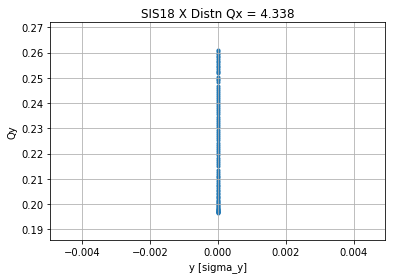

In [132]:
# Plot using maximum amplitude in sigma
bety0=13.47433765
alfy0=0.4264503497
gamy0 = (1+alfy0*alfy0)/bety0
en_y = (12.57e-6)/4
sig_y = np.sqrt(en_y * bety0)

#xx=[]
#xx = np.array(df_data['x'].iloc[min_particle:n_part:])/(np.sqrt(betx0/gamx0))

yn = max_amps_y/sig_y

plt.xlabel('y [sigma_y]')
plt.ylabel('Qy')
plot_title = 'SIS18 X Distn Qy = ' + Qy
plt.title(plot_title)
plt.grid()
plt.scatter(yn,tunes, marker='.')
plot_name = 'SIS18_' + case + 'Qy.png'
plt.savefig(plot_name, dpi=600)
print yn

In [133]:
# Save file
outfile_name = 'SIS18_' + case + '_Tunes.txt'
np.savetxt(outfile_name, zip(xn,tunes), fmt="%3.6e %3.6e")
print 'done'

done
